**ANALISIS EXPLORATORIO DE LOS DATOS**

Contexto:
Se solicita definir, construir y presentar un Dashboard que permita medir los niveles de calidad de servicio, eficiencia y productividad del Call Center. Para ello, se propone que definamos los KPIs adecuados para poder medir los objetivos propuestos, y definir nuevos niveles objetivos de manera de ofrecer esos niveles de SLA a terceras partes, o generar un nuevo servicio Premium para los clientes mas importantes del banco

1. Importacion de Librerias a usar

In [2]:
import numpy as np              # Importamos la libreria numpy para maneros de datos numericos
import pandas as pd             # Importamos la libredia de pandas para cargar los datasets
import matplotlib.pyplot as plt # Importamos la libreria de Matplot para generar graficos para analizar los datos
import seaborn as sns           # Importamos la libreria de Seaborn para generar graficos mejorados en base a la libreria de matplot

2. Extracción de datos del CSV

In [11]:
#df_CallCenter = pd.read_csv('data\Call_Center_1999_DataSet.csv', encoding='utf-8', sep=";")
df_CallCenter = pd.read_csv('data/Call_Center_1999_DataSet.csv', encoding='utf-8', sep=";", dtype={'customer_id': str})
df_CallCenter .head(3)

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0


3. Verificar tipos de datos y la catidad de datos nulos

In [12]:
df_CallCenter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   vru.line     444448 non-null  object
 1   call_id      444448 non-null  int64 
 2   customer_id  444448 non-null  object
 3   priority     444448 non-null  int64 
 4   type         444448 non-null  object
 5   date         444448 non-null  object
 6   vru_entry    444448 non-null  object
 7   vru_exit     444448 non-null  object
 8   vru_time     444448 non-null  int64 
 9   q_start      444448 non-null  object
 10  q_exit       444448 non-null  object
 11  q_time       444448 non-null  int64 
 12  outcome      444448 non-null  object
 13  ser_start    444448 non-null  object
 14  ser_exit     444448 non-null  object
 15  ser_time     444448 non-null  int64 
 16  server       444448 non-null  object
 17  startdate    444448 non-null  int64 
dtypes: int64(6), object(12)
memory usage: 61.0+ 

Observaciones:
Se puede observar que hay un total de 444448 registros, 6 columnas o campos numericos y 12 categoricas de otros tipos(fecha, hora, etc). Tambien se muestra que los datos vienen completos, no hay datos nulos.

4. Aplicar algunas variables estadisticas a las columnas numericas

In [13]:
df_CallCenter.describe(percentiles=[.50, .60, .70, .80, .90, .99])   

,call_id,priority,vru_time,q_time,ser_time,startdate
count,444448.000000,444448.000000,444448.000000,444448.000000,444448.000000,444448.000000
mean,31928.737202,0.780143,10.286081,59.004304,152.561776,172.333974
std,13945.516813,0.888851,34.942136,119.470328,282.372761,104.559247
min,1169.000000,0.000000,-362.000000,0.000000,0.000000,0.000000
50%,35256.000000,0.000000,8.000000,16.000000,84.000000,181.000000
60%,38127.000000,1.000000,9.000000,35.000000,114.000000,212.000000
70%,41146.000000,2.000000,10.000000,61.000000,156.000000,243.000000
80%,44539.000000,2.000000,11.000000,102.000000,223.000000,273.000000
90%,48432.000000,2.000000,14.000000,178.000000,367.000000,304.000000
99%,53236.530000,2.000000,49.000000,435.000000,1108.000000,334.000000


In [14]:
DS= df_CallCenter[df_CallCenter['vru_time'] < 0]      # Filtrar los registros con Tiempo en VRU (Una unidad de respuesta de voz) negativo
DS.head(3)

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
2786,AA0214,12150,29680238,1,PS,1999-01-03,13:55:04,13:54:24,-40,13:54:24,13:56:10,106,AGENT,13:56:09,13:57:28,79,KAZAV,0
3484,AA0106,34252,59630624,1,PS,1999-01-04,14:51:15,14:50:33,-42,14:50:33,14:51:45,72,HANG,0:00:00,0:00:00,0,NO_SERVER,0
4226,AA0204,32267,58720558,2,PS,1999-01-04,23:49:39,23:48:48,-51,23:48:48,23:50:28,100,AGENT,23:50:28,23:52:17,109,BENSION,0


In [15]:
# Cantidad de registros con tiempo en la VRU (Una unidad de respuesta de voz)
DS.shape[0]

350

Observaciones:
Podemos ver que: 
- El promedio de vru_time (tiempo en espera en la VRU) es de 10.2 seg.
- El promedio de q_time (tiempo en espera en cola) es de 59 seg.
- El promedio de ser_time (tiempo en llamada con un agente en cola) es de 152 seg.
- Hay 350 registros con valores vru_time negativos lo cual es un outlier pues los tiempos no pueden ser negativos. 
- Hay valores de tiempo muy altos en comparacion con la desviacion estadar y la media
- El campo startdate no esta como un valor de fecha sino numerica, lo cual no nos sirve para realizar ningun calculo, se eliminara del dataset
- Hay valores atipicos o outliers muy altos lo cual dificulta la graficacion de los datos

5. Eliminar columna startdate

In [16]:
df_CallCenter.drop(['startdate'], axis=1, inplace= True)

6. Revisar si hay valores duplicados

In [17]:
df_CallCenter.duplicated().sum()

0

7. Generar graficos de barras de las variables o campos categoricos

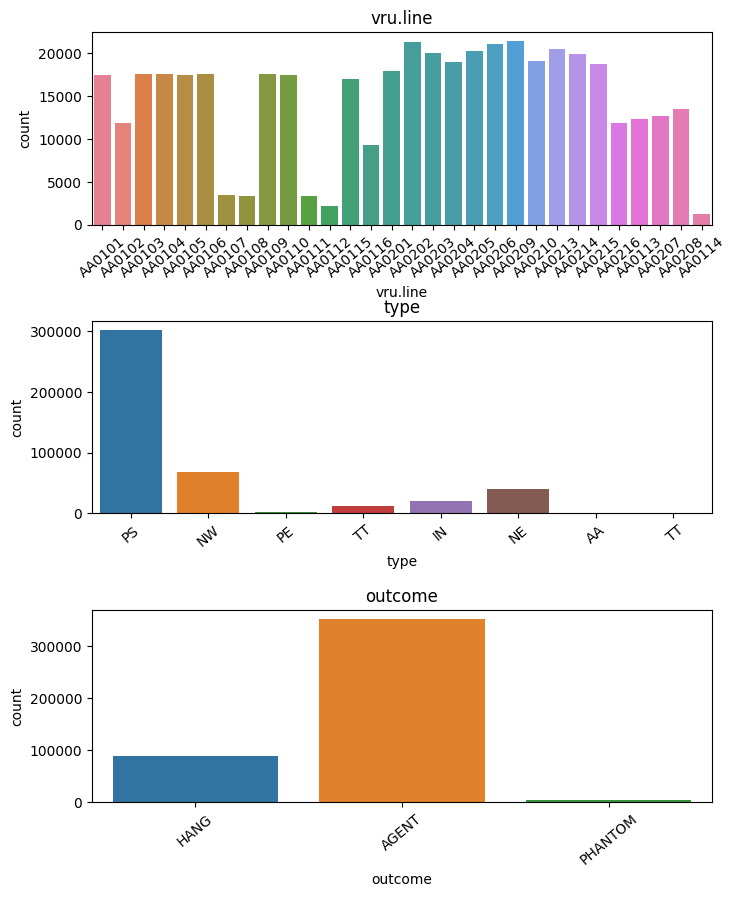

In [19]:
colum_categ = ['vru.line', 'type','outcome']
fig, ax = plt.subplots(nrows=len(colum_categ),ncols=1, figsize=(8,10))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(colum_categ):
    sns.countplot(x=col, data=df_CallCenter, ax= ax[i], hue=col)
    ax[i].set_title(col)
    ax[i].set_xticks(ax[i].get_xticks())
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 40)

Observaciones:
En las graficas de barras enteriores podemos ver el volumen de llamadas por lineas de VRU, tipo de Servicio y outcome (llamadas atendidas satifactoriamente y las que se cortaron)
- Se puede ver que solo estan funcionando 2 VRU de un total de 6. Algunos lineas no estan tomando muchas llamadas
- La mayoria de las llamadas son de tipo "PS" (Actividad Regular)
- Hubo un gran porcentaje de llamadas las cuales se corto el servicio o no se culmino por alguna razon


8. 

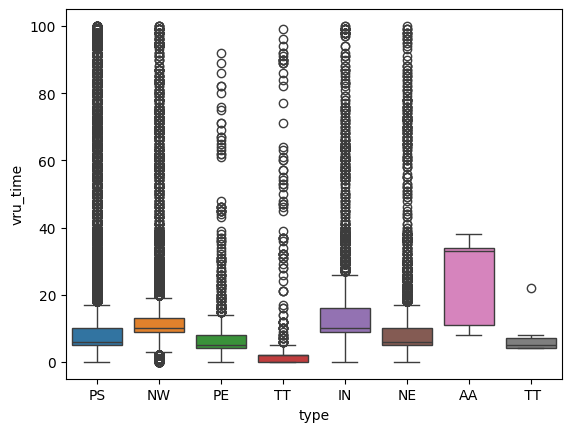

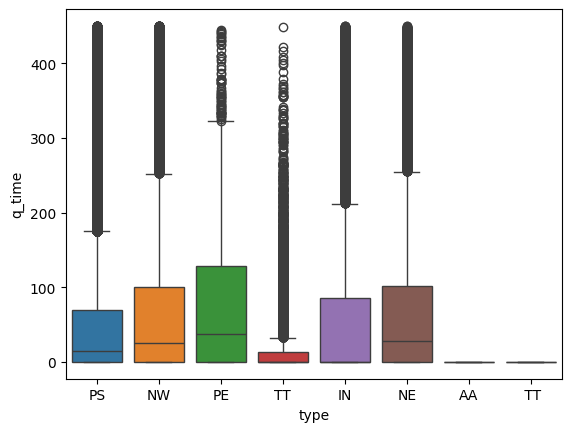

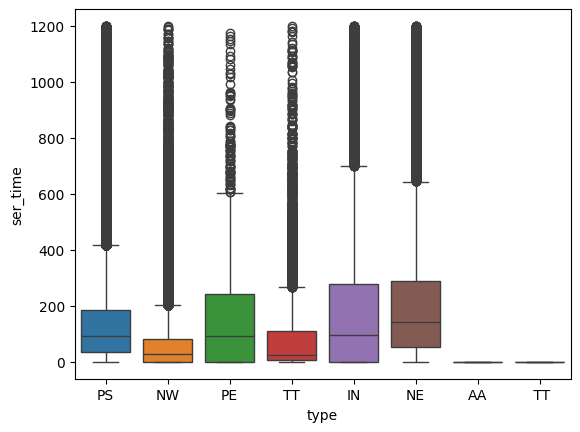

In [20]:
filtro = df_CallCenter.loc[(df_CallCenter['vru_time'] >= 0) & (df_CallCenter['vru_time'] <= 100)]
sns.boxplot(x='type', y='vru_time', data= filtro, hue= 'type')
plt.show()
filtro = df_CallCenter.loc[(df_CallCenter['q_time'] >= 0) & (df_CallCenter['q_time'] <= 450)]
sns.boxplot(x='type', y='q_time', data= filtro, hue= 'type')
plt.show()
filtro = df_CallCenter.loc[(df_CallCenter['ser_time'] >= 0) & (df_CallCenter['ser_time'] <= 1200)]
sns.boxplot(x='type', y='ser_time', data= filtro, hue= 'type')
plt.show()

Observaciones:
Filtramos los datos con el valor prodemio del 99% del dataset para poder graficar los tiempos de las llamadas ya que hay datos con valores demasiado altos lo cual dificulta la visualizacion. Entonces se pudo ver que que hay muchos valores outliers

9. CONCLUSIONES

Se pudo verificar que los datos estan limpios y tienen buena consistencia pero vienen con valores atipicos o outliers muy altos los cuales dificultan el analisis de los datos en graficos.